<a href="https://colab.research.google.com/github/Roaa27/gtc-week2-task1/blob/main/GTC_w2_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Libraries
In this step, I import all the libraries I need for:
- Data manipulation (pandas, numpy)
- Data visualization (matplotlib)
- Data preprocessing (scikit-learn transformers and pipelines)
- Machine Learning models (Linear Regression, Random Forest)
- Model evaluation (cross-validation and error metrics)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

## 2. Upload and Load the Dataset
Here, I  upload the housing.csv file into Google Colab.  
Then I  use pandas to read the dataset and take a first look at its info and first rows.
- Explore the dataset columns and data types
- View summary statistics (mean, min, max, quartiles)



In [3]:
from google.colab import files
uploaded = files.upload()
housing = pd.read_csv(next(iter(uploaded)))

housing.head()
housing.info()
housing.describe()

Saving housing.csv to housing.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 3. Data Description and Missing Values
In this step, I will:
- Check for missing values


In [4]:
missing = housing.isnull().sum().to_frame("missing_count")
missing["missing_pct"] = missing["missing_count"] / len(housing) * 100
missing

,missing_count,missing_pct
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
total_bedrooms,207,1.002907
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
median_house_value,0,0.000000
ocean_proximity,0,0.000000


In [5]:
missing_rows = housing[housing["total_bedrooms"].isna()].sort_values(by=["longitude","latitude"])
print("Number of rows with 'total_bedrooms' missing:", len(missing_rows))
missing_rows.head(20)

Number of rows with 'total_bedrooms' missing: 207


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2647,-124.13,40.55,38.0,544.0,NaN,240.0,91.0,3.2500,94800.0,<1H OCEAN
2578,-124.06,40.86,34.0,4183.0,NaN,1891.0,669.0,3.2216,98100.0,NEAR OCEAN
2608,-124.00,40.92,29.0,1429.0,NaN,672.0,266.0,2.9485,98800.0,<1H OCEAN
19332,-122.91,38.46,18.0,2021.0,NaN,912.0,329.0,4.5000,251900.0,<1H OCEAN
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,191000.0,<1H OCEAN
3328,-122.72,38.88,29.0,2781.0,NaN,890.0,310.0,1.9906,96600.0,INLAND
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,146500.0,<1H OCEAN
19122,-122.65,38.25,23.0,4030.0,NaN,1852.0,778.0,3.4020,193300.0,<1H OCEAN
19071,-122.53,38.32,22.0,3577.0,NaN,1371.0,501.0,5.7950,332300.0,<1H OCEAN
16104,-122.50,37.75,45.0,1620.0,NaN,941.0,328.0,4.3859,270200.0,NEAR OCEAN


## 4. Data Cleaning & Feature Engineering
Here, I :
- Handle missing values in the column total_bedrooms (using median imputation).
- Create new features to add more information to the model:
  - rooms_per_household = total_rooms / households
  - bedrooms_per_room = total_bedrooms / total_rooms
  - population_per_household = population / households

In [6]:
housing_clean = housing.copy()


median_total_bedrooms = housing_clean["total_bedrooms"].median()
housing_clean["total_bedrooms"].fillna(median_total_bedrooms, inplace=True)
print("Imputed total_bedrooms with median =", median_total_bedrooms)


housing_clean["rooms_per_household"] = housing_clean["total_rooms"] / housing_clean["households"]
housing_clean["bedrooms_per_room"] = housing_clean["total_bedrooms"] / housing_clean["total_rooms"]
housing_clean["population_per_household"] = housing_clean["population"] / housing_clean["households"]


housing_clean[["total_rooms","total_bedrooms","households",
               "rooms_per_household","bedrooms_per_room","population_per_household"]].head()

Imputed total_bedrooms with median = 435.0


/tmp/ipython-input-3656613708.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_clean["total_bedrooms"].fillna(median_total_bedrooms, inplace=True)


,total_rooms,total_bedrooms,households,rooms_per_household,bedrooms_per_room,population_per_household
0,880.0,129.0,126.0,6.984127,0.146591,2.555556
1,7099.0,1106.0,1138.0,6.238137,0.155797,2.109842
2,1467.0,190.0,177.0,8.288136,0.129516,2.802260
3,1274.0,235.0,219.0,5.817352,0.184458,2.547945
4,1627.0,280.0,259.0,6.281853,0.172096,2.181467


In [ ]:
def iqr_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    out = df[(df[col] < lower) | (df[col] > upper)]
    return lower, upper, out

cols_to_check = ["total_rooms","total_bedrooms","population","households","median_income","median_house_value",
                 "rooms_per_household","bedrooms_per_room","population_per_household"]

iqr_report = []
for c in cols_to_check:
    lower, upper, out = iqr_outliers(housing_clean, c)
    iqr_report.append((c, lower, upper, len(out)))

iqr_df = pd.DataFrame(iqr_report, columns=["feature","lower","upper","num_outliers"]).set_index("feature")
iqr_df

,lower,upper,num_outliers
feature,,,
total_rooms,-1102.625000,5698.375000,1287
total_bedrooms,-222.375000,1162.625000,1306
population,-620.000000,3132.000000,1196
households,-207.500000,1092.500000,1220
median_income,-0.706375,8.013025,681
median_house_value,-98087.500000,482412.500000,1071
rooms_per_household,2.023219,8.469878,511
bedrooms_per_room,0.077872,0.337479,635
population_per_household,1.150961,4.561041,711


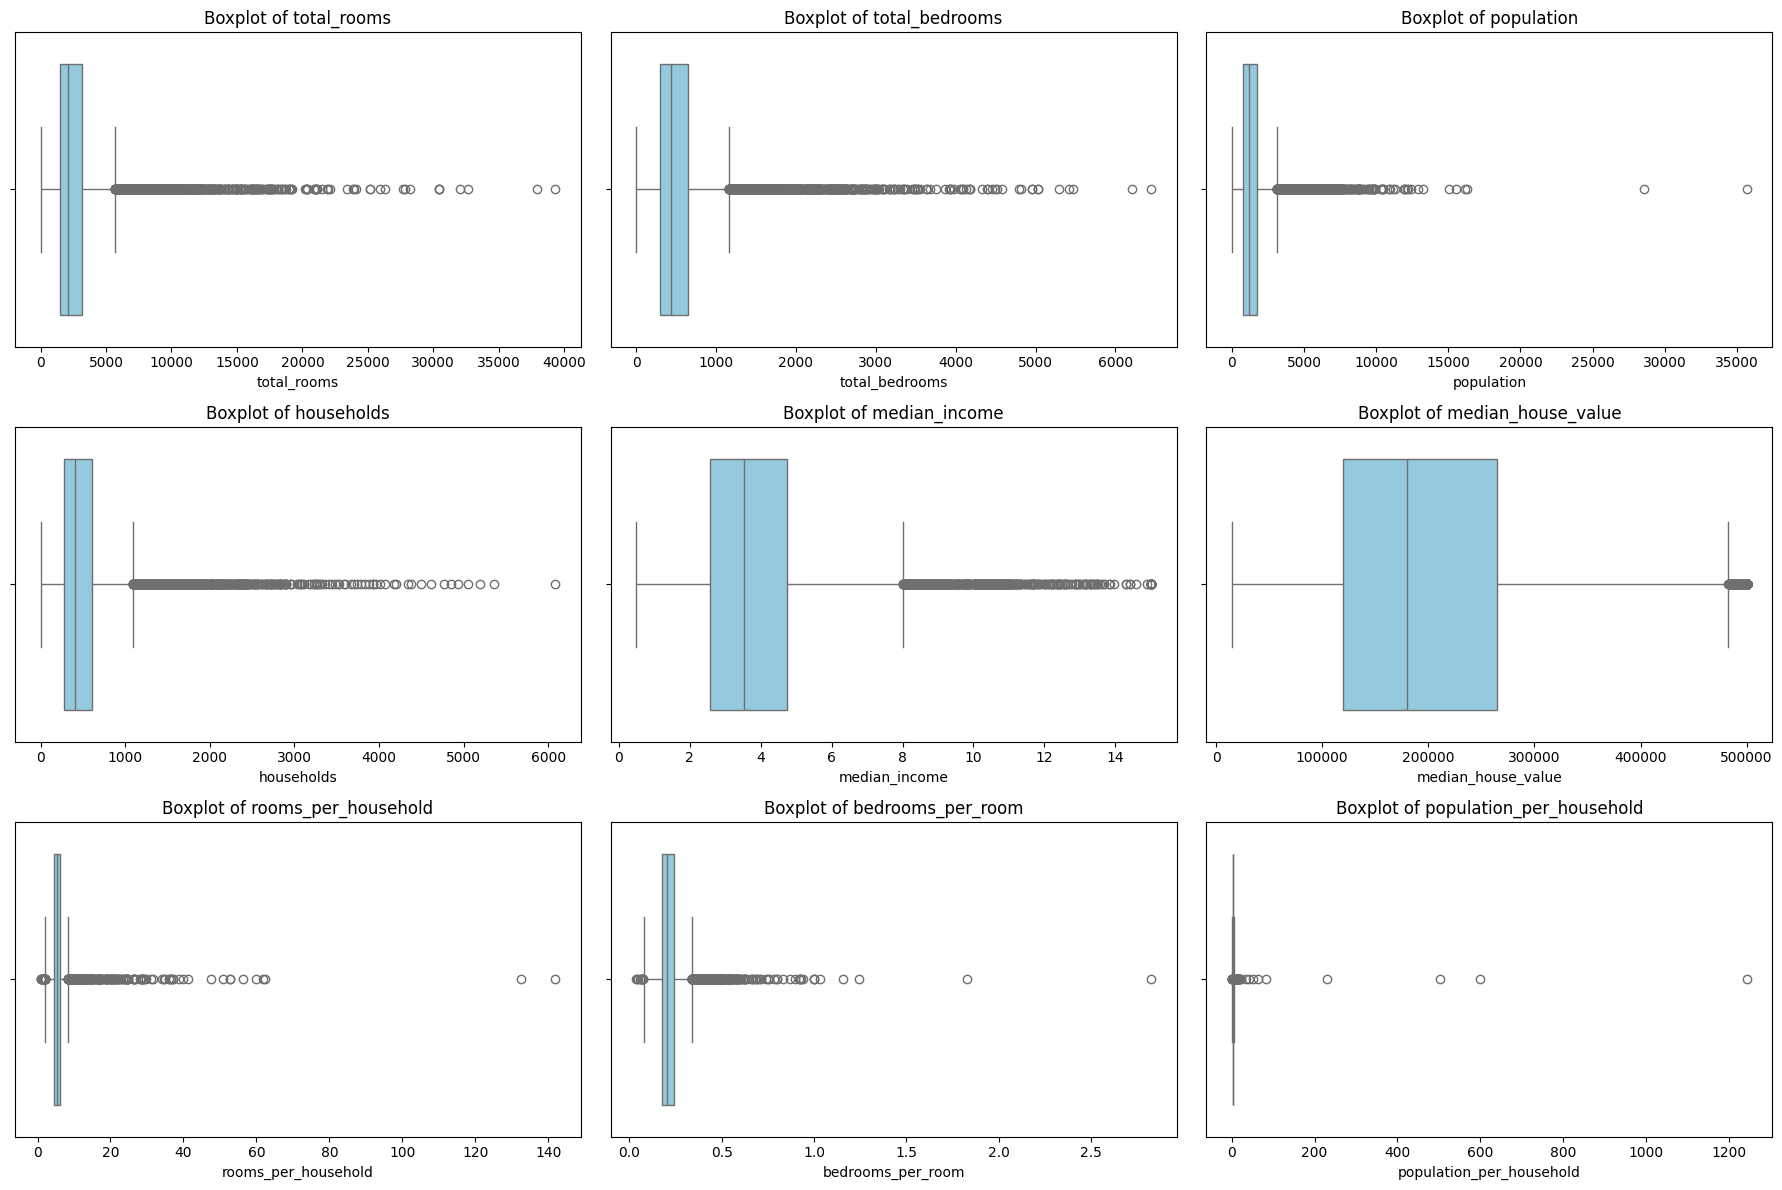

In [10]:
cols_to_check = [
    "total_rooms","total_bedrooms","population","households",
    "median_income","median_house_value",
    "rooms_per_household","bedrooms_per_room","population_per_household"
]

plt.figure(figsize=(18, 12))

for i, col in enumerate(cols_to_check, 1):
    plt.subplot(3, 3, i)  # شبكة 3×3
    sns.boxplot(x=housing_clean[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [15]:
def cap_outliers(df, cols):
    df = df.copy()
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])
    return df

cols_to_fix = [
    "total_rooms","total_bedrooms","population","households",
    "median_income","median_house_value",
    "rooms_per_household","bedrooms_per_room","population_per_household"
]

# نعمل نسخة جديدة من الداتا بعد إصلاح outliers
housing_capped = cap_outliers(housing_clean, cols_to_fix)

print("B:", housing_clean.shape)
print("A:", housing_capped.shape)


B: (20640, 13)
A: (20640, 13)


## 5. Data Visualization
I  visualize the data to better understand relationships:
- Histogram of the target variable (`median_house_value`)
- Scatter plot of median_income vs median_house_value
- A geographic scatter plot (longitude vs latitude) colored by house value

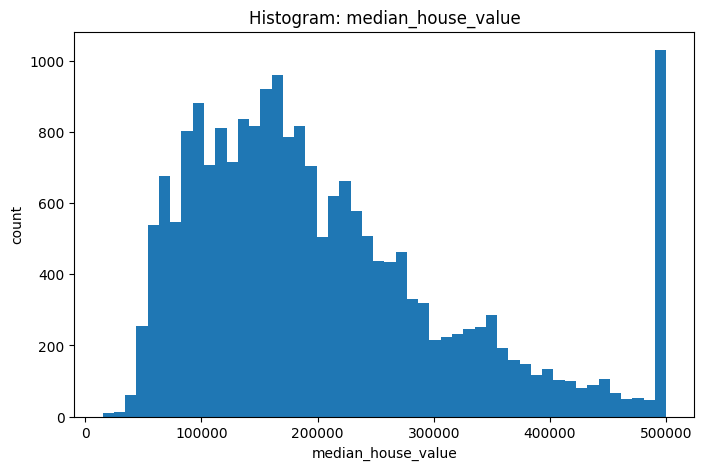

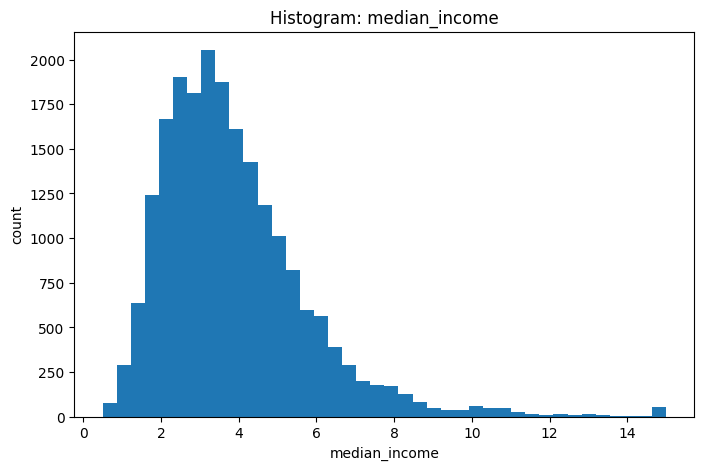

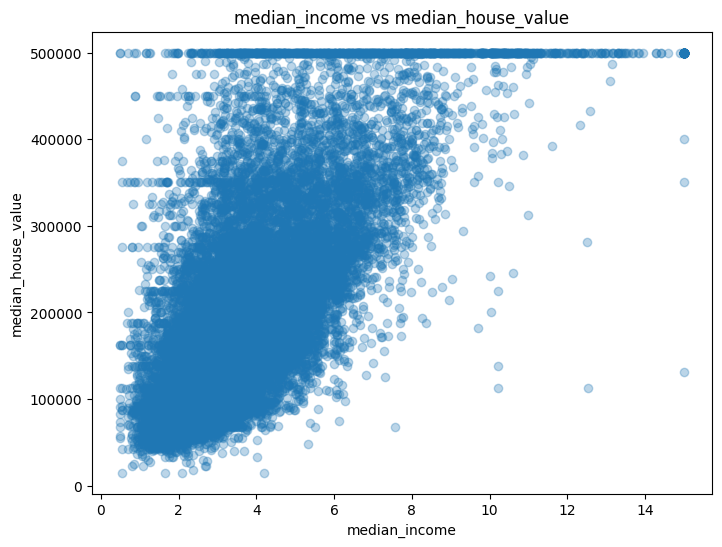

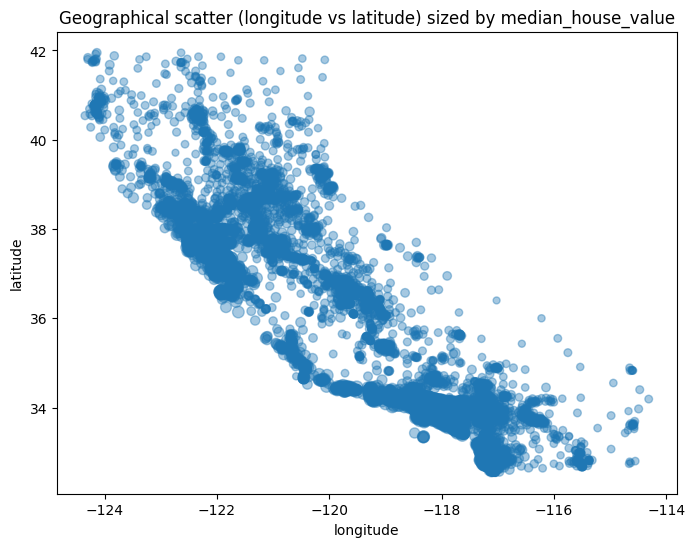

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(housing_clean["median_house_value"], bins=50)
plt.title("Histogram: median_house_value")
plt.xlabel("median_house_value")
plt.ylabel("count")
plt.show()


plt.figure(figsize=(8,5))
plt.hist(housing_clean["median_income"], bins=40)
plt.title("Histogram: median_income")
plt.xlabel("median_income")
plt.ylabel("count")
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(housing_clean["median_income"], housing_clean["median_house_value"], alpha=0.3)
plt.title("median_income vs median_house_value")
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.show()

plt.figure(figsize=(8,6))
sizes = (housing_clean["median_house_value"] - housing_clean["median_house_value"].min()) / (housing_clean["median_house_value"].max() - housing_clean["median_house_value"].min())
sizes = 50 * (0.5 + sizes)
plt.scatter(housing_clean["longitude"], housing_clean["latitude"], s=sizes, alpha=0.4)
plt.title("Geographical scatter (longitude vs latitude) sized by median_house_value")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()



## Correlation Heatmap

In this step, I  generate a correlation heatmap for the numeric features.  
This helps me understand how strongly each feature is related to the target variable median_house_value.  

- Values close to +1 → strong positive correlation (when the feature increases, house value also increases).  
- Values close to -1 → strong negative correlation (when the feature increases, house value decreases).  
- Values around 0 → weak or no correlation.  

This visualization will also help me identify the most important features for the model.

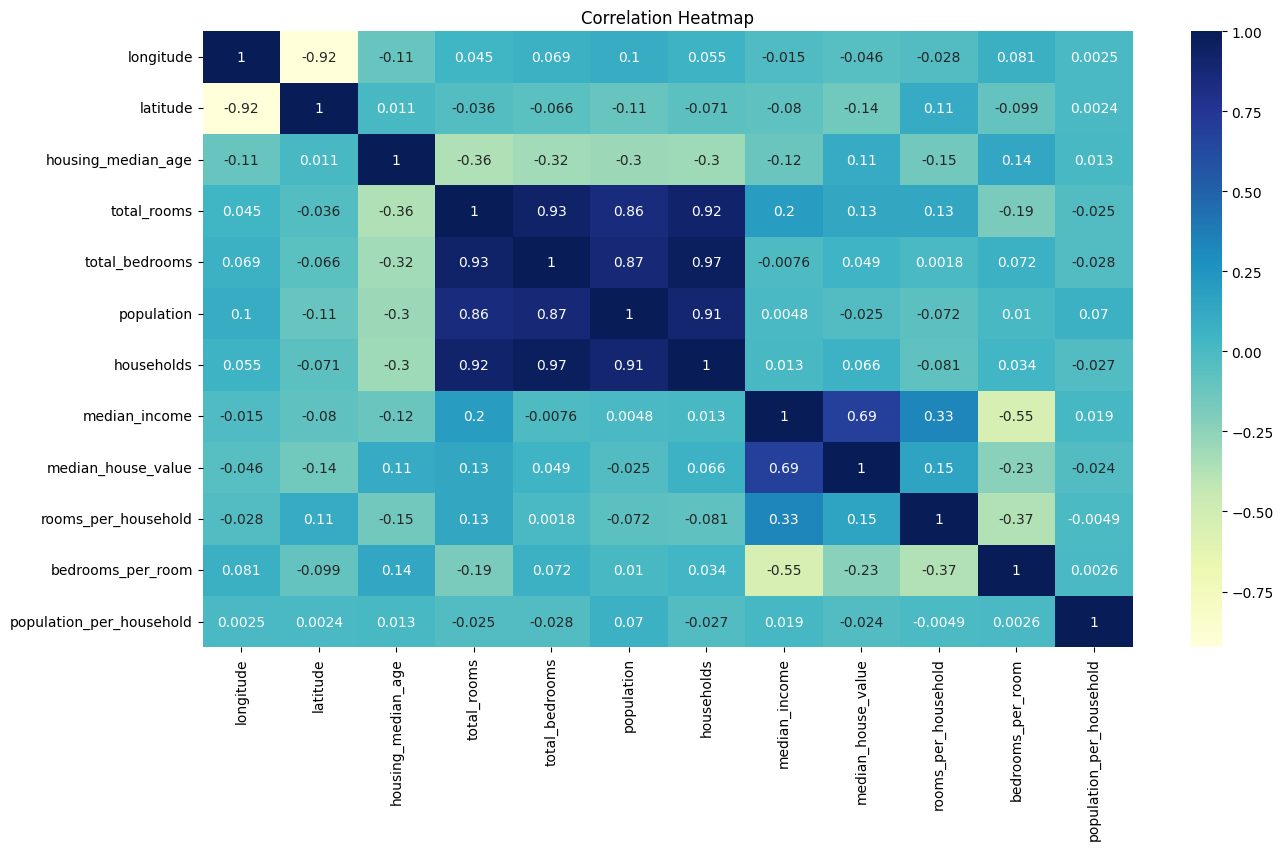

In [9]:
corr_matrix = housing_clean.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

## 6. Train/Test Split
I  split the dataset into:
- Features (X) and target (y)
- Training set (80%) and Test set (20%)
This allows us to train on one part of the data and evaluate on unseen data.

In [ ]:
X = housing_clean.drop("median_house_value", axis=1)
y = housing_clean["median_house_value"].copy()

num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(include=["object"]).columns.tolist()
print("Numeric:", num_features)
print("Categorical:", cat_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train:", X_train.shape, "Test:", X_test.shape)

Numeric: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']
Categorical: ['ocean_proximity']
Train: (16512, 12) Test: (4128, 12)


## 7. Preprocessing Pipeline
I  build a pipeline to handle preprocessing:
- Numerical features: imputation (median) + scaling
- Categorical features: one-hot encoding
Finally, I transform the training and test sets into prepared data for ML models.

In [ ]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# fit-transform on train, transform test
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

print("Prepared shapes:", X_train_prepared.shape, X_test_prepared.shape)

Prepared shapes: (16512, 16) (4128, 16)


## 8. Model Training and Cross-Validation
I train two models:
- Linear Regression (baseline model)
- Random Forest Regressor (more complex model)

I  use cross-validation (5-fold) to compare their performance using RMSE (Root Mean Squared Error).

In [ ]:
lin_reg = LinearRegression()
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

def cv_rmse(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=cv)
    rmse = np.sqrt(-scores)
    return rmse.mean(), rmse.std()

lin_mean, lin_std = cv_rmse(lin_reg, X_train_prepared, y_train, cv=5)
forest_mean, forest_std = cv_rmse(forest_reg, X_train_prepared, y_train, cv=5)

print("CV RMSE (LinearRegression): {:.2f} ± {:.2f}".format(lin_mean, lin_std))
print("CV RMSE (RandomForest): {:.2f} ± {:.2f}".format(forest_mean, forest_std))

CV RMSE (LinearRegression): 67848.83 ± 1562.85
CV RMSE (RandomForest): 50211.66 ± 649.06


## 9. Final Evaluation on Test Set
I  train both models on the training set and evaluate them on the test set (unseen data).  
This gives us a final measure of performance in a real-world scenario.

In [ ]:
lin_reg.fit(X_train_prepared, y_train)
forest_reg.fit(X_train_prepared, y_train)

y_pred_lin = lin_reg.predict(X_test_prepared)
y_pred_forest = forest_reg.predict(X_test_prepared)

lin_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))
forest_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_forest))

print("Test RMSE (Linear): {:.2f}".format(lin_test_rmse))
print("Test RMSE (Forest): {:.2f}".format(forest_test_rmse))

pred_df = X_test.copy().reset_index(drop=True)
pred_df["actual"] = y_test.reset_index(drop=True)
pred_df["pred_forest"] = y_pred_forest
pred_df["pred_lin"] = y_pred_lin
pred_df.head(20)

Test RMSE (Linear): 72668.54
Test RMSE (Forest): 50363.60


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,actual,pred_forest,pred_lin
0,-119.01,36.06,25.0,1505.0,435.0,1392.0,359.0,1.6812,INLAND,4.192201,0.289037,3.877437,47700.0,48444.00,61463.744666
1,-119.46,35.14,30.0,2943.0,435.0,1565.0,584.0,2.5313,INLAND,5.039384,0.147808,2.679795,45800.0,112344.00,121631.218100
2,-122.44,37.80,52.0,3830.0,435.0,1310.0,963.0,3.4801,NEAR BAY,3.977155,0.113577,1.360332,500001.0,460218.45,267594.253891
3,-118.72,34.28,17.0,3051.0,435.0,1705.0,495.0,5.7376,<1H OCEAN,6.163636,0.142576,3.444444,218600.0,267227.00,264252.963820
4,-121.93,36.62,34.0,2351.0,435.0,1063.0,428.0,3.7250,NEAR OCEAN,5.492991,0.185028,2.483645,278000.0,235516.00,258213.789828
5,-117.61,34.08,12.0,4427.0,435.0,2400.0,843.0,4.7147,INLAND,5.251483,0.098261,2.846975,158700.0,194185.00,151805.134515
6,-118.02,33.89,36.0,1375.0,435.0,670.0,221.0,5.0839,<1H OCEAN,6.221719,0.316364,3.031674,198200.0,266800.08,308380.085708
7,-118.08,33.92,38.0,1335.0,435.0,1011.0,269.0,3.6908,<1H OCEAN,4.962825,0.325843,3.758364,157500.0,163436.00,243588.672418
8,-122.08,37.39,4.0,2292.0,435.0,1050.0,584.0,4.8036,NEAR BAY,3.924658,0.189791,1.797945,340000.0,251528.03,257766.450671
9,-118.23,34.18,45.0,2332.0,435.0,943.0,339.0,8.1132,<1H OCEAN,6.879056,0.186535,2.781711,446600.0,478867.75,410596.381660


## 10. Conclusion
- Missing values in total_bedrooms were handled using median imputation.
- Feature Engineering added useful ratios (rooms per household, bedrooms per room, population per household).
- Visualization helped us understand income and location effects on housing prices.
- Models:
  - Linear Regression provided a simple baseline.
  - Random Forest performed better with lower RMSE.


In [ ]:
import joblib
joblib.dump(full_pipeline, "full_pipeline.joblib")
joblib.dump(forest_reg, "forest_model.joblib")
print("Saved: full_pipeline.joblib , forest_model.joblib")